In [1]:
import matplotlib.pyplot as plt

plt.rc('figure', figsize=(10, 7))

In [2]:
# load Iris dataset
from sklearn import datasets
import numpy as np
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

In [3]:
# split data to training and cv datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [4]:
# feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [5]:
# teaching a perceptron
from sklearn.linear_model import Perceptron
ppn = Perceptron(n_iter = 40, eta0 = 0.1, random_state = 0)
ppn.fit(X_train_std, y_train)

Perceptron(alpha=0.0001, class_weight=None, eta0=0.1, fit_intercept=True,
      n_iter=40, n_jobs=1, penalty=None, random_state=0, shuffle=True,
      verbose=0, warm_start=False)

In [6]:
# try to predict data
from sklearn.metrics import accuracy_score
y_pred = ppn.predict(X_test_std)
print('Accuracy of perceptron: %.2f' % accuracy_score(y_test, y_pred))

Accuracy of perceptron: 0.91


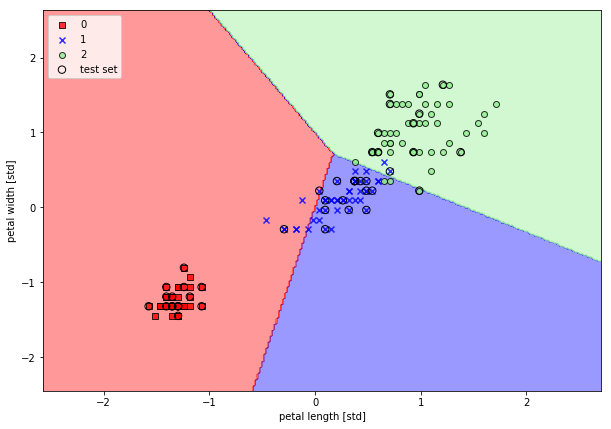

In [7]:
# plot decision boundaries
from plot_decision_regions import plot_decision_regions
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X = X_combined_std, y = y_combined, classifier = ppn, test_idx = range(105, 150))
plt.xlabel('petal length [std]')
plt.ylabel('petal width [std]')
plt.legend(loc = 'upper left')
plt.show()

In [8]:
# logistic regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C = 1000.0, random_state = 0)
lr.fit(X_train_std, y_train)
y_pred = lr.predict(X_test_std)
print('Accuracy of logistic regression: %.2f' % accuracy_score(y_test, y_pred))

Accuracy of logistic regression: 0.98


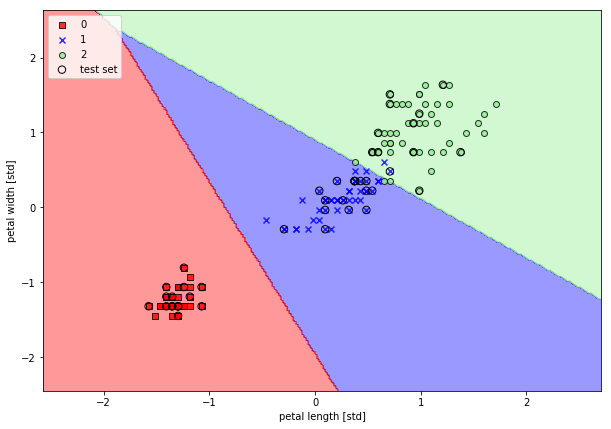

In [9]:
# plot results of logistic regression
plot_decision_regions(X = X_combined_std, y = y_combined, classifier = lr, test_idx = range(105, 150))
plt.xlabel('petal length [std]')
plt.ylabel('petal width [std]')
plt.legend(loc = 'upper left')
plt.show()

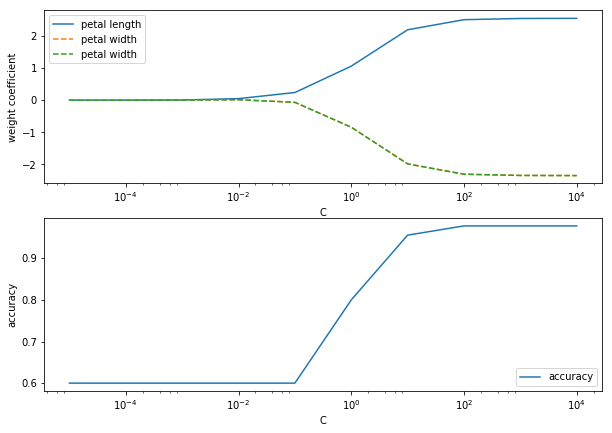

In [10]:
# effect of regularization
weights, params, accuracy = [], [], []
for c in np.arange(-5, 5):
    lr = LogisticRegression(C = 10.0**c, random_state = 0)
    lr.fit(X_train_std, y_train)
    y_pred = lr.predict(X_test_std)
    accuracy.append(accuracy_score(y_test, y_pred))
    weights.append(lr.coef_[1])
    params.append(10.0**c)
weights = np.array(weights)
plt.figure(1)
plt.subplot(211)
plt.plot(params, weights[:,0], label = 'petal length')
plt.plot(params, weights[:,1], linestyle = '--', label = 'petal width')
plt.plot(params, weights[:,1], linestyle = '--', label = 'petal width')
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.legend(loc = 'best')
plt.xscale('log')
plt.subplot(212)
plt.plot(params, accuracy, label = 'accuracy')
plt.ylabel('accuracy')
plt.xlabel('C')
plt.legend(loc = 'lower right')
plt.xscale('log')
plt.show()

In [11]:
# support vector machines
from sklearn.svm import SVC
svm = SVC(kernel='linear', C = 1.0, random_state = 0)
svm.fit(X_train_std, y_train)
y_pred = svm.predict(X_test_std)
print('Accuracy of SVM: %.2f' % accuracy_score(y_test, y_pred))

Accuracy of SVM: 0.98


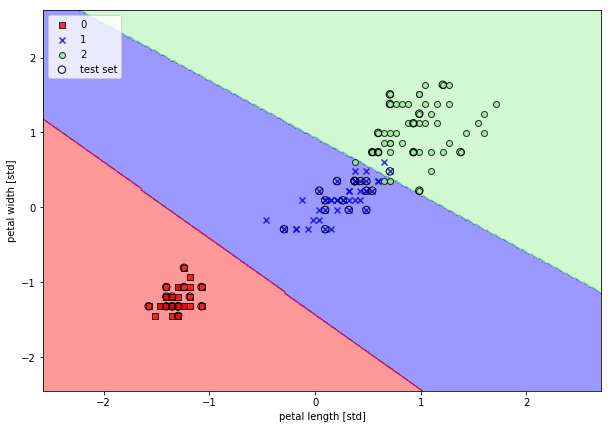

In [12]:
# plot results of SVM
plot_decision_regions(X = X_combined_std, y = y_combined, classifier = svm, test_idx = range(105, 150))
plt.xlabel('petal length [std]')
plt.ylabel('petal width [std]')
plt.legend(loc = 'upper left')
plt.show()

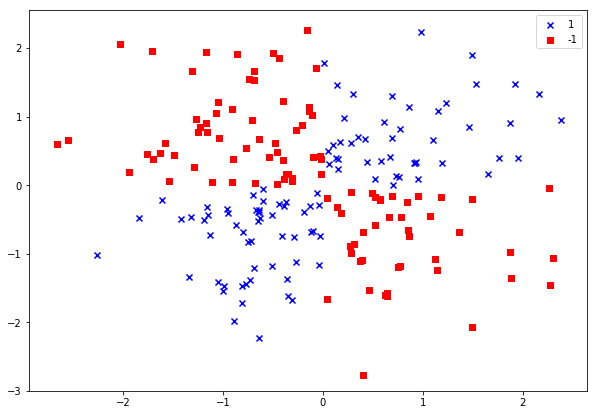

In [13]:
# non-linear problems and SVM (XOR)
np.random.seed(0)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0, X_xor[:, 1] > 0)
y_xor = np.where(y_xor, -1, 1)
plt.scatter(X_xor[y_xor == 1, 0], X_xor[y_xor == 1, 1], c = 'b', marker = 'x', label = '1')
plt.scatter(X_xor[y_xor == -1, 0], X_xor[y_xor == -1, 1], c = 'r', marker = 's', label = '-1')
plt.ylim(-3.0)
plt.legend()
plt.show()

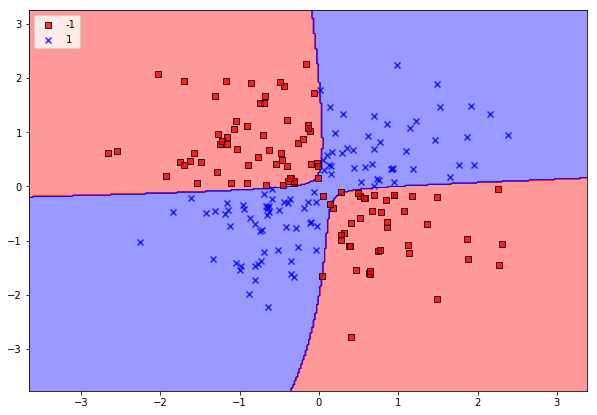

In [14]:
svm = SVC(kernel='rbf', gamma = 0.10, C = 50.0, random_state = 0)
svm.fit(X_xor, y_xor)
plot_decision_regions(X_xor, y_xor, classifier = svm)
plt.legend(loc = 'upper left')
plt.show()

In [15]:
# SVM with RBF kernel and Iris dataset
svm = SVC(kernel='rbf', gamma = 0.20, C = 10.0, random_state = 0)
svm.fit(X_train_std, y_train)
y_pred = svm.predict(X_test_std)
print('Accuracy of SVM: %.2f' % accuracy_score(y_test, y_pred))

Accuracy of SVM: 0.98


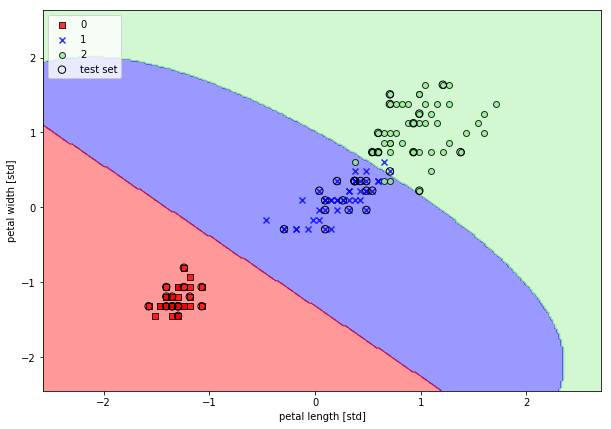

In [16]:
# plot results of SVM with RBF kernel
plot_decision_regions(X = X_combined_std, y = y_combined, classifier = svm, test_idx = range(105, 150))
plt.xlabel('petal length [std]')
plt.ylabel('petal width [std]')
plt.legend(loc = 'upper left')
plt.show()